In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')

In [22]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

Ghost = 169626  
Electron = 5610  
Muon = 29839  
Pion = 774220  
Kaon = 138261  
Proton = 81951

In [5]:
old_features = {'Electron': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                             'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                          'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                         'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                           'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [6]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}

In [7]:
import xgboost as xgb

## One-vs-all test

In [8]:
from sklearn.cross_validation import train_test_split

In [29]:
def get_best_val_xgboost(train, test, pid, feature_dict, xgb_params):
    train_tmp, val_tmp = train_test_split(train, test_size=.1, 
                                       stratify=np.abs(train.MCParticleType.values) == pid_dict[pid])
    
    dtrain_tmp = xgb.DMatrix(train_tmp[feature_dict[pid]], 
                     label=(np.abs(train_tmp.MCParticleType.values) == pid_dict[pid]).astype('int'),
                     feature_names=feature_dict[pid])
    dval = xgb.DMatrix(val_tmp[feature_dict[pid]], 
                     label=(np.abs(val_tmp.MCParticleType.values) == pid_dict[pid]).astype('int'),
                     feature_names=feature_dict[pid])
    
    watchlist = ((dtrain_tmp, 'train'), (dval, 'validation'))
    
    try_gbm = xgb.train(xgb_params, dtrain_tmp, num_boost_round=2000, 
          evals=watchlist, early_stopping_rounds=300, verbose_eval=True)
    
    tree_lim = try_gbm.best_iteration
    
    dtrain = xgb.DMatrix(train[feature_dict[pid]], 
                     label=(np.abs(train.MCParticleType.values) == pid_dict[pid]).astype('int'),
                     feature_names=feature_dict[pid])
    dtest = xgb.DMatrix(test[feature_dict[pid]], feature_names=feature_dict[pid])
    
    final_gbm = xgb.train(xgb_params, dtrain, num_boost_round=try_gbm.best_iteration,
                          verbose_eval=False)
    
    preds = final_gbm.predict(dtest)
    return preds

In [9]:
train_tmp, test_tmp = train_test_split(train, test_size=.1, 
                                       stratify=np.abs(train.MCParticleType.values) == pid_dict["Electron"])

In [11]:
dtrain = xgb.DMatrix(train_tmp[old_features['Electron']], 
                     label=(np.abs(train_tmp.MCParticleType.values) == pid_dict["Electron"]).astype('int'),
                     feature_names=old_features['Electron'])
dval = xgb.DMatrix(test_tmp[old_features['Electron']], 
                     label=(np.abs(test_tmp.MCParticleType.values) == pid_dict["Electron"]).astype('int'),
                     feature_names=old_features['Electron'])

In [23]:
params = {
    'nthread': 0,
    'eval_metric': 'logloss',
    'eta': .03,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}

In [19]:
watchlist = ((dtrain, 'train'), (dval, 'validation'))

In [ ]:
gbm = xgb.train(params, dtrain, num_boost_round=5000, 
          evals=watchlist, early_stopping_rounds=300, verbose_eval=True)

In [24]:
params = {
    'nthread': 0,
    'eval_metric': 'logloss',
    'eta': .03,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}

In [27]:
ele_preds = get_best_val_xgboost(train, test, 'Electron', old_features, params)

In [30]:
ghost_preds = get_best_val_xgboost(train, test, 'Ghost', old_features, params)
muon_preds = get_best_val_xgboost(train, test, 'Muon', old_features, params)
pion_preds = get_best_val_xgboost(train, test, 'Pion', old_features, params)
kaon_preds = get_best_val_xgboost(train, test, 'Kaon', old_features, params)
proton_preds = get_best_val_xgboost(train, test, 'Proton', old_features, params)

In [56]:
target_tmp = test.MCParticleType.values[np.array([i in pid_dict.values() for i in np.abs(test.MCParticleType.values)])]

In [63]:
target = np.zeros(target_tmp.shape)
target[np.abs(target_tmp) == pid_dict['Ghost']] = 0*np.ones(
                        (np.abs(target_tmp) == pid_dict['Ghost']).sum())
target[np.abs(target_tmp) == pid_dict['Muon']] = 1*np.ones(
                        (np.abs(target_tmp) == pid_dict['Muon']).sum())
target[np.abs(target_tmp) == pid_dict['Pion']] = 2*np.ones(
                        (np.abs(target_tmp) == pid_dict['Pion']).sum())
target[np.abs(target_tmp) == pid_dict['Kaon']] = 3*np.ones(
                        (np.abs(target_tmp) == pid_dict['Kaon']).sum())
target[np.abs(target_tmp) == pid_dict['Proton']] = 4*np.ones(
                        (np.abs(target_tmp) == pid_dict['Proton']).sum())
target[np.abs(target_tmp) == pid_dict['Electron']] = 5*np.ones(
                        (np.abs(target_tmp) == pid_dict['Electron']).sum())

preds = np.zeros((999566, 6))
preds[:, 0] = ghost_preds[np.array([i in pid_dict.values() for i in np.abs(test.MCParticleType.values)])]
preds[:, 1] = muon_preds[np.array([i in pid_dict.values() for i in np.abs(test.MCParticleType.values)])]
preds[:, 2] = pion_preds[np.array([i in pid_dict.values() for i in np.abs(test.MCParticleType.values)])]
preds[:, 3] = kaon_preds[np.array([i in pid_dict.values() for i in np.abs(test.MCParticleType.values)])]
preds[:, 4] = proton_preds[np.array([i in pid_dict.values() for i in np.abs(test.MCParticleType.values)])]
preds[:, 5] = ele_preds[np.array([i in pid_dict.values() for i in np.abs(test.MCParticleType.values)])]

label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

In [64]:
import utils

In [72]:
import utils_new

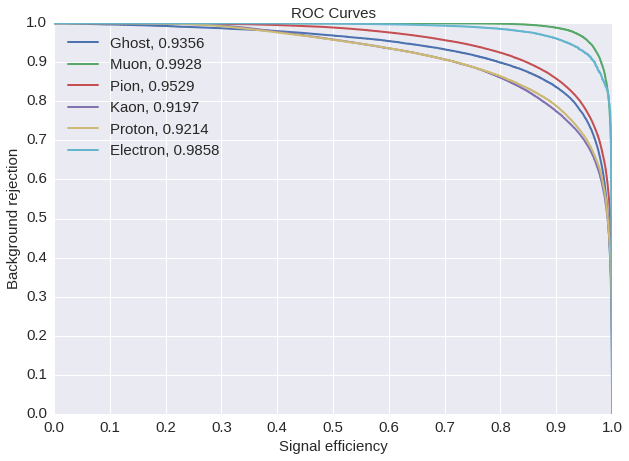

In [73]:
utils_new.get_roc_curves(target, preds, label_list)

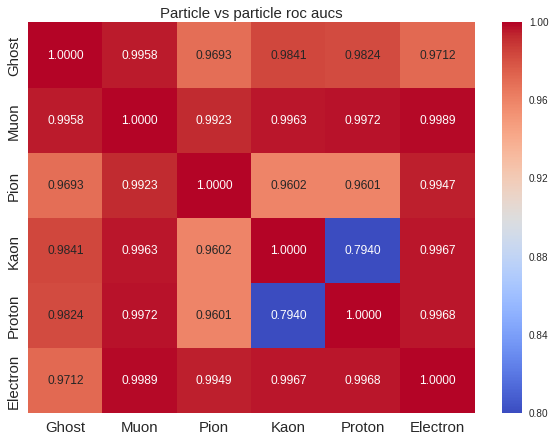

In [75]:
mat = utils_new.get_roc_auc_matrix(target, preds, label_list)

In [78]:
mat2 = pd.read_csv('./PID/python/class_vs_class_roc_auc_matrix_baseline.csv', index_col='Unnamed: 0')

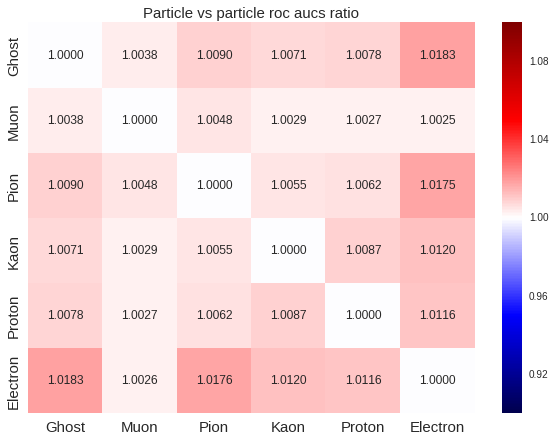

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,1.003794,1.009014,1.007063,1.007820,1.018259
Muon,1.003794,1.000000,1.004790,1.002940,1.002693,1.002547
Pion,1.009014,1.004772,1.000000,1.005463,1.006201,1.017489
Kaon,1.007063,1.002940,1.005463,1.000000,1.008652,1.012040
Proton,1.007820,1.002693,1.006200,1.008652,1.000000,1.011571
Electron,1.018260,1.002551,1.017606,1.011973,1.011576,1.000000


In [80]:
utils_new.get_roc_auc_ratio_matrix(mat, mat2)

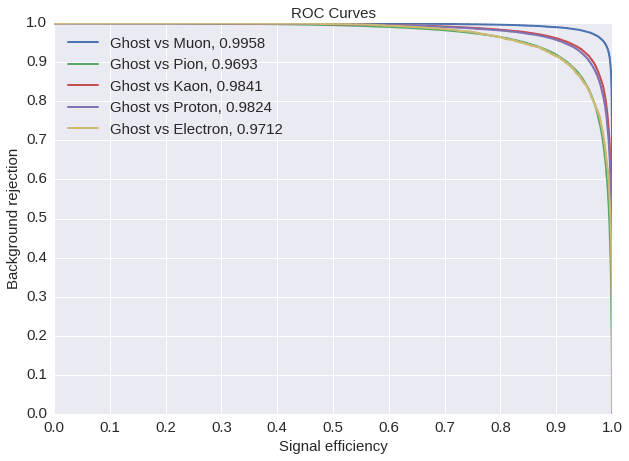

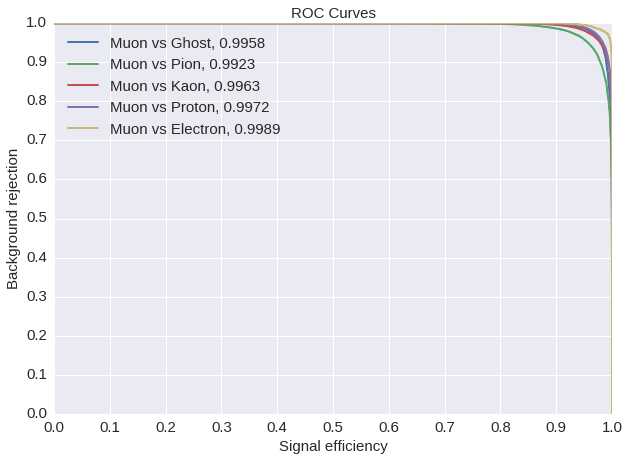

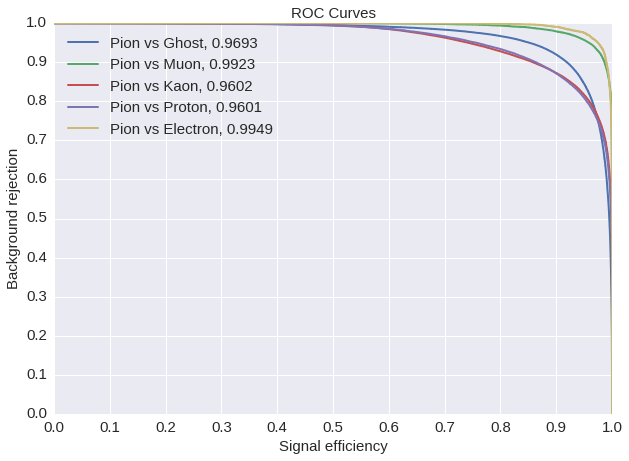

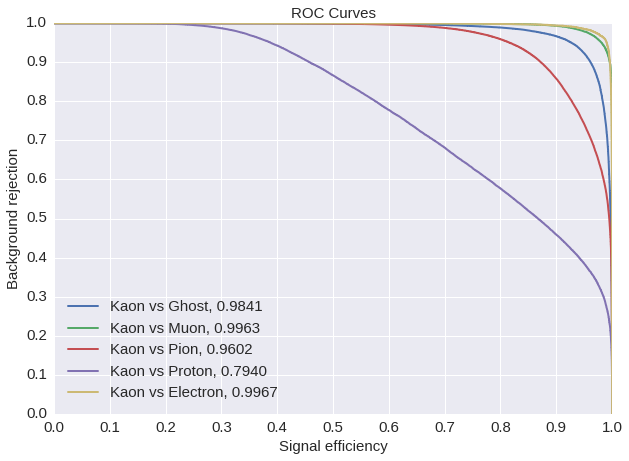

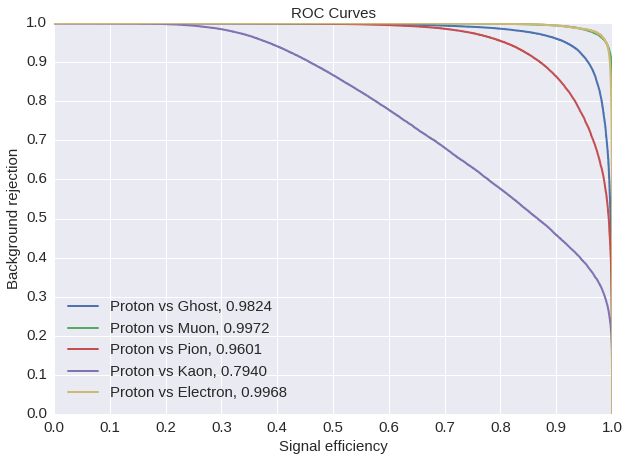

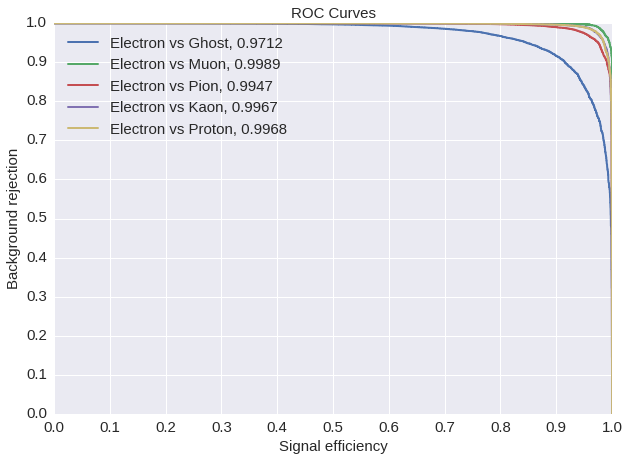

In [82]:
utils_new.get_one_vs_one_roc_curves(target, preds, label_list)

In [ ]:
from sklearn.metrics import log_loss
def flatness_loss(preds, dtrain):
    labels = dtrain.get_label()
    logl = log_loss(labels, preds)
    
    grad = preds - labels
    hess = preds * (1.0-preds)
    return grad, hess